# Benjamin BENTEKE
## AIMS-SENEGAL 2019-2020
### TRAVAIL PRATIQUE INDIVIDUEL

# REGRESSION MULTIPLE (POLYNOMIAL) AVEC NUMPY

In [36]:
import numpy as np
from sklearn.datasets import make_regression # Permet de generer les données de maniere aléatoire dans scikit learn
import matplotlib.pyplot as plt

# STEP 1: DATASET

In [40]:
x,y=make_regression(n_samples=100, n_features=1, noise=10) # on cree deux tableaux: x et y donc (x,y) notre dataset
y=y+abs(y/2)

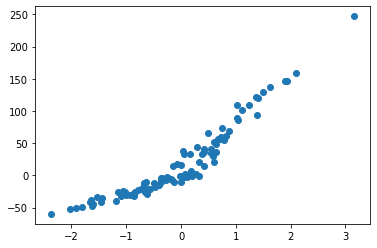

In [42]:
plt.scatter(x,y)

### Verification de la dimension de matrice

In [43]:
print(x.shape,y.shape)

(100, 1) (100,)


##### Il faut redimensionner y

In [44]:
y=y.reshape(y.shape[0],1) # y.shape[0] veut dire nombre de lignes de y

In [45]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


## Creation de la matrice X

In [59]:
np.random.seed(2)
X=np.hstack((x,np.ones(x.shape)))
X=np.hstack((x**2,X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 2.53091466e-02  1.59088487e-01  1.00000000e+00]
 [ 1.05716419e+00  1.02818490e+00  1.00000000e+00]
 [ 3.26476942e-01 -5.71381608e-01  1.00000000e+00]
 [ 2.49939768e-01  4.99939764e-01  1.00000000e+00]
 [ 2.20074980e-02  1.48349243e-01  1.00000000e+00]
 [ 3.27767088e-03  5.72509465e-02  1.00000000e+00]
 [ 1.06972847e-01  3.27067038e-01  1.00000000e+00]
 [ 2.06538124e+00 -1.43714343e+00  1.00000000e+00]
 [ 1.52284159e+00  1.23403468e+00  1.00000000e+00]
 [ 4.41936789e+00  2.10222927e+00  1.00000000e+00]]


In [47]:
theta=np.random.randn(3,1) # un vecteur aléatoire normale
print(theta.shape)
print(theta)

(3, 1)
[[-0.41675785]
 [-0.05626683]
 [-2.1361961 ]]


# STEP 2 CREATION OF NON-LINEAR MODEL

In [48]:
def model(X,theta):
    return X.dot(theta) # produit matricel entre X et theta

### Test de la fonction model

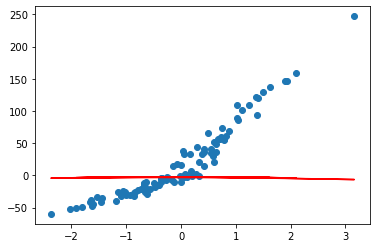

In [49]:
#model(X,theta)
plt.scatter(x,y)
plt.plot(x,model(X,theta),c='r') # car la pente est negatives

# STEP 3 FONCTION COUT

In [50]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)
    

In [51]:
cost_function(X,y,theta) # On veut que cost_function tende vers 0

1797.664060249888

# STEP 4 GRADIENTS GRADIENT DESCENT

In [52]:
def grad(X,y,theta):
    m=len(y)
    return (1/m)*np.transpose(X).dot(model(X,theta)-y)

In [53]:
def gradient_desc(X,y,theta,learnin_rate,n_iterations):
    
    cost_history=np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta=theta-learnin_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        
    return theta,cost_history

### Comments:

# STEP 5  ENTRAINEMENT DU MODEL

### Machine learning

In [54]:
theta_final,cost_history=gradient_desc(X,y,theta,learnin_rate=0.01,n_iterations=1000)
theta_final

array([[10.25435599],
       [52.00343211],
       [10.66909777]])

## Test dans le model pour le theta_final obtenu

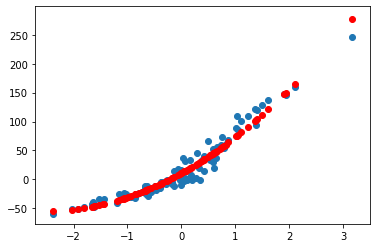

In [55]:
predictions=model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')

### Comments:

## comments

# STEP 6 COURBE D'APPRENTISSAGE

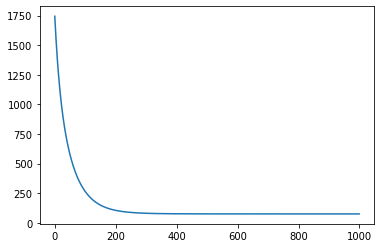

In [56]:
plt.plot(range(1000),cost_history)

### Comments:

# COEFFICIENT DE DETERMINATION

In [57]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()  # La somme de carrées residuelles ou le residus de la somme de carrées
    v= ((y-y.mean())**2).sum() # La somme total
    return 1-u/v

In [58]:
coef_determination(y,predictions)

0.9527427039116858

# FIN